Now, after all the ETL process, im going to adjust a Regretion Model that predicts the happiness score 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import math

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

In [2]:
df = pd.read_csv("../data/happiness_merged_2015-2019.csv")
df.head()


,Country,Region,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Perceptions_of_Corruption
0,Afghanistan,Southern Asia,2015,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719
1,Albania,Central and Eastern Europe,2015,4.959,0.87867,0.80434,0.81325,0.35733,0.14272,0.06413
2,Algeria,Middle East and Northern Africa,2015,5.605,0.93929,1.07772,0.61766,0.28579,0.07822,0.17383
3,Angola,Sub-Saharan Africa,2015,4.033,0.75778,0.86040,0.16683,0.10384,0.12344,0.07122
4,Argentina,Latin America and Caribbean,2015,6.574,1.05351,1.24823,0.78723,0.44974,0.11451,0.08484


In [3]:
print("\nValores nulos por columna:")
print(df.isnull().sum())
print(f"\nTotal de valores nulos: {df.isnull().sum().sum()}")


Valores nulos por columna:
Country                      0
Region                       0
Year                         0
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Generosity                   0
Perceptions_of_Corruption    0
dtype: int64

Total de valores nulos: 0


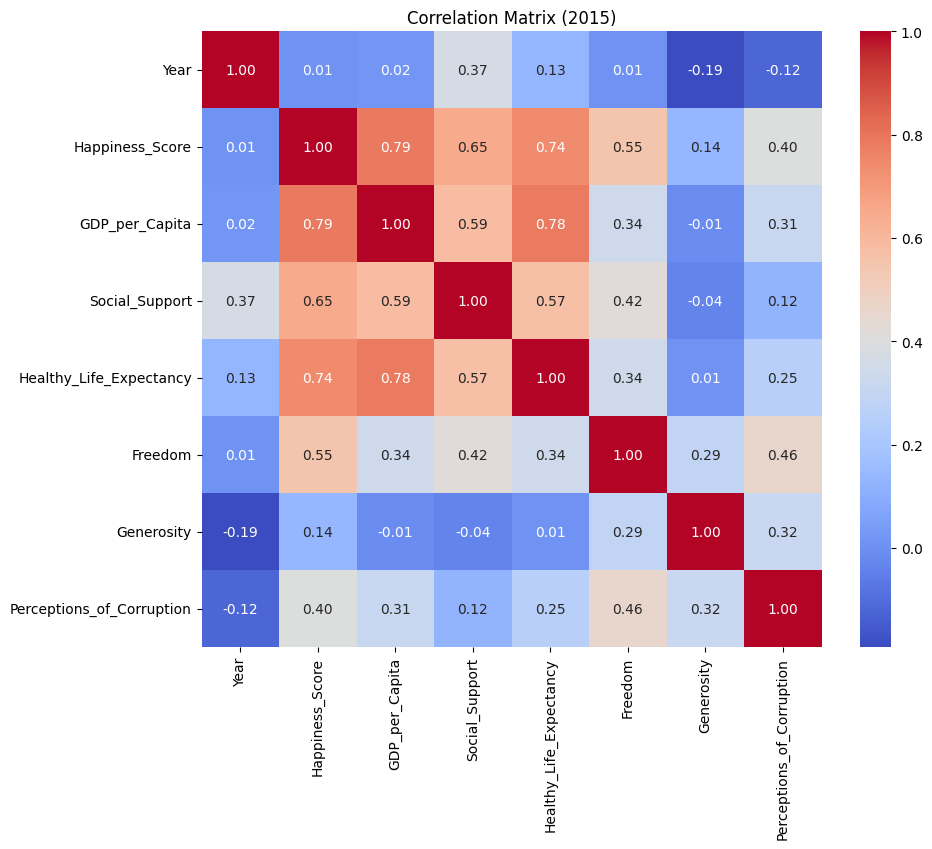

In [4]:
# Correlation matrix (use only numeric columns to avoid conversion errors)
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.empty:
	print("No numeric columns available for correlation.")
else:
	corr_matrix = numeric_df.corr()
	plt.figure(figsize=(10, 8))
	sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
	plt.title('Correlation Matrix (2015)')
	plt.show()

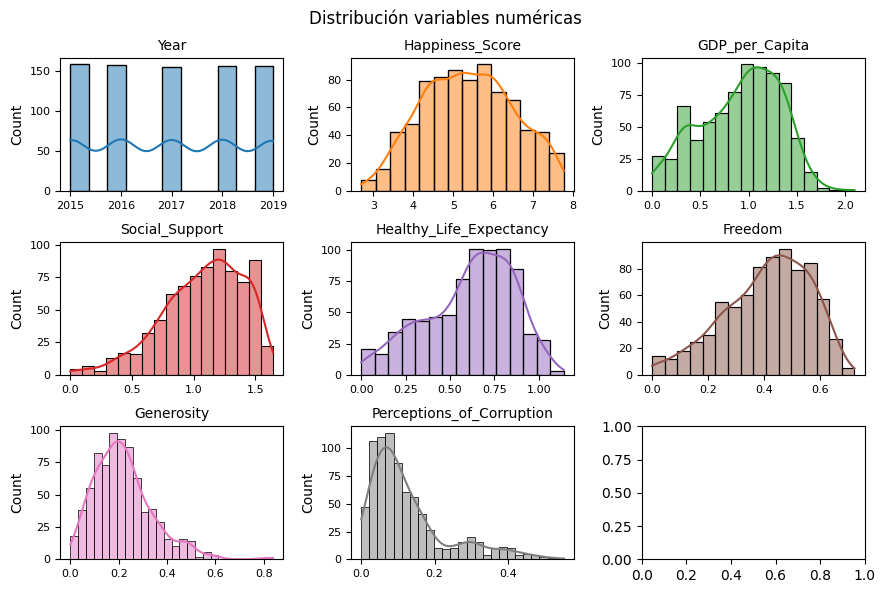

In [5]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 6))
axes = axes.flat

for i, colum in enumerate(numeric_df):
    sns.histplot(
        data    = numeric_df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
   
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 12);

In [6]:
features = [
    'Country', 'Region', 'GDP_per_Capita', 'Social_Support',
    'Healthy_Life_Expectancy', 'Freedom', 'Generosity',
    'Perceptions_of_Corruption'
]
target = 'Happiness_Score'

In [7]:
# Características numéricas 
feature_columns = [
    'GDP_per_Capita', 'Social_Support',
    'Healthy_Life_Expectancy', 'Freedom', 'Generosity',
    'Perceptions_of_Corruption'
    ]
    
categorical_cols = ['Country', 'Region']

In [8]:
# --- Preprocesamiento: OneHotEncoder para categóricas ---
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', feature_columns)
    ]
)

In [10]:
# --- Crear pipeline con preprocesador + modelo de regresión ---
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# --- Entrenar modelo ---
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
model.fit(X_train, y_train)

# --- Evaluación ---
y_pred = model.predict(X_test)

# Calcular métricas de desempeño
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mostrar resultados
print("✅ Evaluación del modelo:")
print(f"  R² (Coeficiente de determinación): {r2:.3f}")
print(f"  MAE (Error medio absoluto): {mae:.3f}")
print(f"  RMSE (Raíz del error cuadrático medio): {rmse:.3f}")


✅ Evaluación del modelo:
  R² (Coeficiente de determinación): 0.929
  MAE (Error medio absoluto): 0.195
  RMSE (Raíz del error cuadrático medio): 0.279


In [14]:
print(X_train.shape)
print(X_test.shape)

(547, 8)
(235, 8)


In [11]:
with open("../regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Modelo guardado como regression_model.pkl")

✅ Modelo guardado como regression_model.pkl
